# Course project: A predictive model based on movie data
## ZHANG Weiwen 20583632 wzhangbu@connect.ust.hk

In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import re

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from collections import Counter

# Data description: the movie data

The movie data can be accessed via the file 'data_final.csv'. This dataset consists of 3376 movies with rich metadata including revenue, budget, genres, keywords, production companies, release date, cast, and crew.

In [3]:
X_removed = pd.read_csv('data_final.csv')  
X_removed.head()

,revenue,budget,genres,keywords,production_companies,release_date,cast,crew
0,2787965087,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,961000000,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,880674609,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,1084939099,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,284139100,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Task

In this assignment, you are asked to fit a model to predict revenue in log-scale (y= log (revenue)) based on other information provided (you can use all of them or just a subset of them). Besides, you need to randomly partition the whole data set (3376 movies) into training set (3000 movies) and testing set (376 movies).

The model can only be trained based on the training dataset. Then the performance of the prediction should be evaluated based on testing dataset via calculating the following prediction  R2 :
1−∑ni=1(yi,true−yi,predict)2∑ni=1(yi,true−1n∑nj=1yi,true)2.
 
Note that the best possible score is 1.0, and it can be negative. As an example, a constant model that always predicts the expected value of  y , disregarding the input features, would get a score of 0.0. Moreover, as the prediction of revenue should be performed in log-scale, both  ytrain  and  ytest  are logarithm of revenue.

# Requirements

You must work independently on this assignment. Borrowing ideas from others will lead to a substantial reduction of your grading.
You need to submit a report, in which you should clearly describe your method and explain your idea. The code should also be included. It takes up 30% in the grading of this course.
You can use R or Python for coding. You are also allowed to call packages in R or Python to do this project as long as you understand the chosen method.
Your report should be in the pdf format, which is automatically generated by either R markdown or Jupyter notebook.
If you have any question, contact our TA, Cai Mingxuan, by email mcaiad@ust.hk.

# Introduction to the project and baseline models

## The baseline model (linear regression, revenue ~ [1, budget])

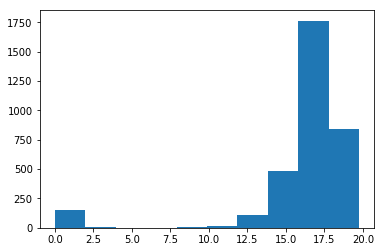

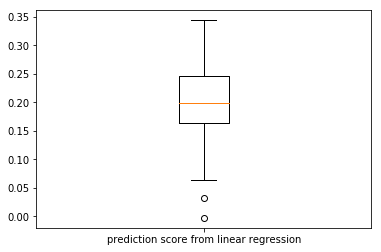

The mean is 0.1985283576703422 and the standard deviation is 0.06352812210966392.


In [4]:
# get revenue (outcome)
y_revenue_removed = np.log(X_removed['revenue'])
# get budget
X_budget_raw = X_removed['budget'].values.reshape(-1, 1)
X_budget_raw = np.log(X_budget_raw + 1.0)

plt.hist(X_budget_raw)

# fit linear regression model
score = [0 for i in range(100)]
for i in range(100):
    #seperate train and test dataset
    movies_num = np.shape(X_budget_raw)[0]
    order = np.arange(movies_num)
    np.random.shuffle(order)
    X_train = X_budget_raw[order][:3000]
    X_test = X_budget_raw[order][3000:]
    y_train = y_revenue_removed.values[order][:3000]
    y_test = y_revenue_removed.values[order][3000:]
    
    #fit model and evalute
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    score[i] = reg.score(X_test, y_test)

# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score)
ax.set_xticklabels(['prediction score from linear regression'])
plt.show()
print("The mean is {} and the standard deviation is {}.".\
      format(np.mean(score), np.sqrt(np.var(score))))

## Linear regression, revenue ~ [1, budget, budget_zero]

budget_zero = 1, if budget = 0; budget_zero = 0, otherwise.

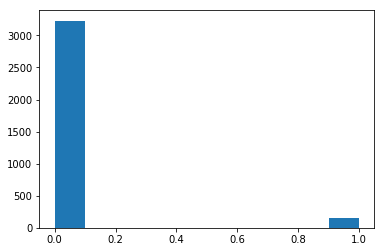

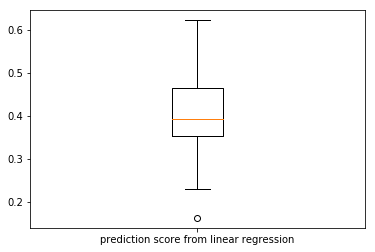

The mean is 0.4020927710851477 and the standard deviation is 0.08186463423960141.


In [157]:
# get revenue (outcome)
y_revenue_removed = np.log(X_removed['revenue'])
# get budget
X_budget_raw = X_removed['budget'].values.reshape(-1, 1)
X_budget_raw = np.log(X_budget_raw + 1.0)
X_removed['budget_zero'] = np.where(X_removed['budget'] == 0, 1, 0)
X_budget_zero = X_removed['budget_zero'].values.reshape(-1, 1)
plt.hist(X_budget_zero)
# form feature matrix
X_feature = np.concatenate((X_budget_raw, X_budget_zero), axis = 1)

# fit linear regression model
score = [0 for i in range(100)]
for i in range(100):
    #seperate train and test dataset
    movies_num = np.shape(X_feature)[0]
    order = np.arange(movies_num)
    np.random.shuffle(order)
    X_train = X_feature[order][:3000]
    X_test = X_feature[order][3000:]
    y_train = y_revenue_removed.values[order][:3000]
    y_test = y_revenue_removed.values[order][3000:]
    
    #fit model and evalute
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    score[i] = reg.score(X_test, y_test)

# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score)
ax.set_xticklabels(['prediction score from linear regression'])
plt.show()
print("The mean is {} and the standard deviation is {}.".\
      format(np.mean(score), np.sqrt(np.var(score))))

## Now expore the data

Above are the base lines provided.
In this report, I will do experiment with different linear model with different regression techniques. And I will traverse and dataset to explore more features that can polish our model and strengthen the performance.

# 1.  Gradienty Boosting Regression and Ridge Regression

Above linear regressions were done by navie linea regressio model, now I try to improve the performance by apllying Gradienty Boosting Regression and Ridge Regression. And I illustrate the idea still through the regression on log_revenue~budget.

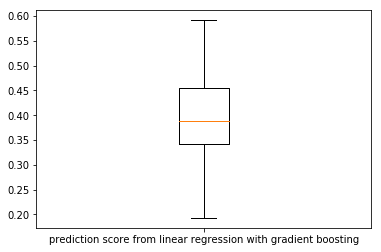

The mean is 0.3972361277499812 and the standard deviation is 0.08158926426890403.


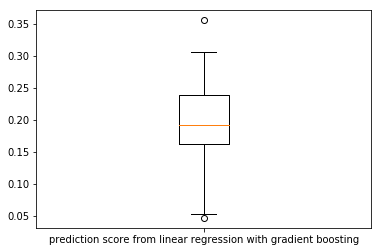

The mean is 0.1937969804830226 and the standard deviation is 0.0594984049173099.


In [158]:
# get revenue (outcome)
y_revenue_removed = np.log(X_removed['revenue'])
# get budget
X_budget_raw = X_removed['budget'].values.reshape(-1, 1)
X_budget_raw = np.log(X_budget_raw + 1.0)

# initialize score array
score = [0 for i in range(100)]
score1 = [0 for i in range(100)]
for i in range(100):
    #seperate train and test dataset
    movies_num = np.shape(X_budget_raw)[0]
    order = np.arange(movies_num)
    np.random.shuffle(order)
    X_train = X_budget_raw[order][:3000]
    X_test = X_budget_raw[order][3000:]
    y_train = y_revenue_removed.values[order][:3000]
    y_test = y_revenue_removed.values[order][3000:]
    
    #fit gradient boost model and evalute
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X_train, y_train)
    score[i] = reg.score(X_test, y_test)
   
    #fit ridge regression model and evalute
    reg1 =  Ridge(alpha=1.0)
    reg1.fit(X_train, y_train)
    score1[i] = reg1.score(X_test, y_test)

# visualize prediction score for gradient boosting
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score)
ax.set_xticklabels(['prediction score from linear regression with gradient boosting'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score), \
                                                                np.sqrt(np.var(score))))

# visualize prediction score for ridge regression
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score1)
ax.set_xticklabels(['prediction score from linear regression with gradient boosting'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score1), \
                                                                np.sqrt(np.var(score1))))

Above, gradient boosting and ridge scheme both improve the performance, but gradient boosting improves a lot and ridge only did a slight imrpovement.

## 1.1 Briefly Recall the Gradient Boosting and Ridge Regression

When we are training the linear model, accurracy is alway what we concern. But overfitting may occur when we fit the model to training set excessively. Ridge Regression is implemented to deal with such overfitting with a regularizaion in form a a 2-norm on parameters of the linear model in loss funcion. By doing so, we can constrain the training from overfitting and prevent unexpect collapse of testing accuracy.

Here we implemented another idea is known as Gradient Boosting. Generally, Boosting algorithm is an optimization algorith in the way of iterating the model. At each iteration, it involves weak "learners" and iteratively improves the performance until we get a stronge "learner". Here in gradient boosing, the model is learned in the direction of the gradient descent.

## 1.2 Implement Gradient Boosting Regression and Ridge Regression on Revenue~Budget + Zero_Budget

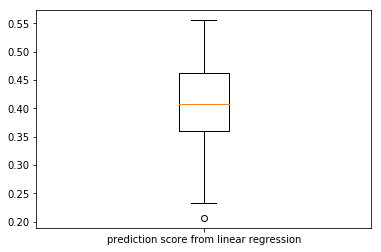

The mean is 0.408786388162826 and the standard deviation is 0.07708299182211453.


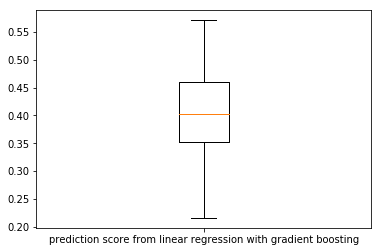

The mean is 0.4067359845261337 and the standard deviation is 0.07768391822653872.


In [159]:
# get revenue (outcome)
y_revenue_removed = np.log(X_removed['revenue'])
# get budget
X_budget_raw = X_removed['budget'].values.reshape(-1, 1)
X_budget_raw = np.log(X_budget_raw + 1.0)
X_removed['budget_zero'] = np.where(X_removed['budget'] == 0, 1, 0)
X_budget_zero = X_removed['budget_zero'].values.reshape(-1, 1)

# form feature matrix
X_feature = np.concatenate((X_budget_raw, X_budget_zero), axis = 1)

# fit linear regression model
score = [0 for i in range(100)]
score1 = [0 for i in range(100)]
for i in range(100):
    #seperate train and test dataset
    movies_num = np.shape(X_feature)[0]
    order = np.arange(movies_num)
    np.random.shuffle(order)
    X_train = X_feature[order][:3000]
    X_test = X_feature[order][3000:]
    y_train = y_revenue_removed.values[order][:3000]
    y_test = y_revenue_removed.values[order][3000:]
    
    #fit model and evalute for gradient boosting
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X_train, y_train)
    score[i] = reg.score(X_test, y_test)
    
    #fit model and evalute for redge regression
    reg1 =  Ridge(alpha=1.0)
    reg1.fit(X_train, y_train)
    score1[i] = reg1.score(X_test, y_test)

# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score)
ax.set_xticklabels(['prediction score from linear regression'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score), \
                                                                np.sqrt(np.var(score))))

# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score1)
ax.set_xticklabels(['prediction score from linear regression with gradient boosting'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score1), \
                                                                np.sqrt(np.var(score1))))

I noticed that, ridge regression was greatly improved by invoving the Zero_Budget variable, this implies that zero budget may disturb the performance of ridge regression in previous training.
And gradient boosting regression didn't vary too much, it implies that these zero numbers has little impact on gradient descent.

# 2. Explore more variables

## 2.1 Movie release year

Firstly, I preprocesss the dataset to extract the release years.

In [160]:
# Get the release date
X_date = X_removed['release_date'].values.reshape(-1, 1)
X_year = np.zeros_like(X_date)
# X_month = np.zeros_like(X_date)
# X_day = np.zeros_like(X_date)

j=0
for i in X_date:
    X_year[j] = i[0][0:4]
#     X_month[j] = i[0][5:7]
#     X_day[j] = i[0][8:10]
    j += 1

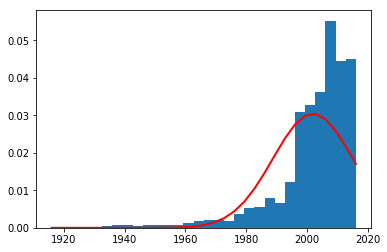

In [161]:
year_plot = X_year.astype(np.float)
mu = np.mean(year_plot)
sigma = np.std(year_plot)
num = len(year_plot)
rand_data = np.random.normal(mu,sigma,num)
count, bins, ignored = plt.hist(year_plot, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) \
         *np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

This plot breifly tells about the distribution of data in time line. I notice that most movies were release in 2000~2020, and the peak appeared around 2000.
This plot not only shows the distribution of variable - release year, but also illustrates the data situation of this dataset.

Then I fit the model by gradient boosting regression and ridge respectively

In [162]:
# get revenue (outcome)
y_revenue_removed = np.log(X_removed['revenue'])
# get budget
X_budget_raw = X_removed['budget'].values.reshape(-1, 1)
X_budget_raw = np.log(X_budget_raw + 1.0)

# form feature matrix
X_feature = np.concatenate((X_budget_raw, X_year), axis = 1)

# fit linear regression model
score = [0 for i in range(100)]
score1 = [0 for i in range(100)]
for i in range(100):
    #seperate train and test dataset
    movies_num = np.shape(X_feature)[0]
    order = np.arange(movies_num)
    np.random.shuffle(order)
    X_train = X_feature[order][:3000]
    X_test = X_feature[order][3000:]
    y_train = y_revenue_removed.values[order][:3000]
    y_test = y_revenue_removed.values[order][3000:]
    
    #fit model and evalute
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X_train, y_train)
    score[i] = reg.score(X_test, y_test)
    
    #fit model and evalute for redge regression
    reg1 =  Ridge(alpha=1.0)
    reg1.fit(X_train, y_train)
    score1[i] = reg1.score(X_test, y_test)

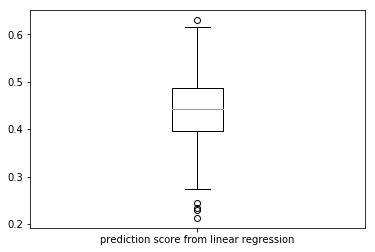

The mean is 0.4408830188684859 and the standard deviation is 0.0834814597325866.


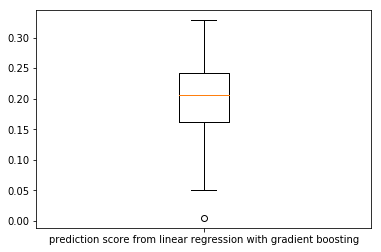

The mean is 0.20276299782883492 and the standard deviation is 0.06156457631099858.


In [163]:
# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score)
ax.set_xticklabels(['prediction score from linear regression'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score), \
                                                                np.sqrt(np.var(score))))


# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score1)
ax.set_xticklabels(['prediction score from linear regression with gradient boosting'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score1), \
                                                                np.sqrt(np.var(score1))))

Result shows that gradient boosting performs much better than ridge, which can reach the score of approximately 0.44 (re-run for multiple times)

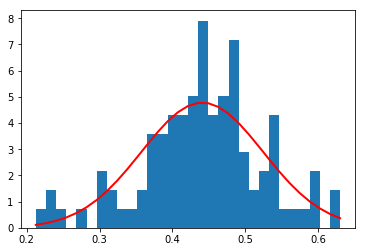

In [165]:
mu = np.mean(score)
sigma = np.std(score)
num = len(score)
rand_data = np.random.normal(mu,sigma,num)
count, bins, ignored = plt.hist(score, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) \
         *np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

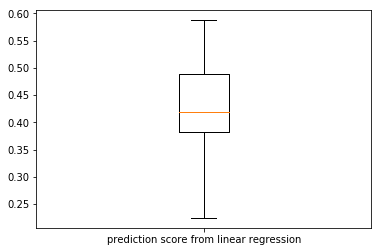

The mean is 0.43095168032624237 and the standard deviation is 0.0743326445056811.


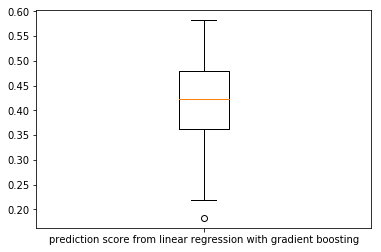

The mean is 0.417310884274064 and the standard deviation is 0.08308132474236424.


In [205]:
# get revenue (outcome)
y_revenue_removed = np.log(X_removed['revenue'])
# get budget
X_budget_raw = X_removed['budget'].values.reshape(-1, 1)
X_budget_raw = np.log(X_budget_raw + 1.0)

# form feature matrix
X_feature = np.concatenate((X_budget_raw,X_budget_zero, X_year), axis = 1)

# fit linear regression model
score = [0 for i in range(100)]
score1 = [0 for i in range(100)]
for i in range(100):
    #seperate train and test dataset
    movies_num = np.shape(X_feature)[0]
    order = np.arange(movies_num)
    np.random.shuffle(order)
    X_train = X_feature[order][:3000]
    X_test = X_feature[order][3000:]
    y_train = y_revenue_removed.values[order][:3000]
    y_test = y_revenue_removed.values[order][3000:]
    
    #fit model and evalute
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X_train, y_train)
    score[i] = reg.score(X_test, y_test)
    
    #fit model and evalute for redge regression
    reg1 =  Ridge(alpha=1.0)
    reg1.fit(X_train, y_train)
    score1[i] = reg1.score(X_test, y_test)
    
    # visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score)
ax.set_xticklabels(['prediction score from linear regression'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score), \
                                                                np.sqrt(np.var(score))))

# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score1)
ax.set_xticklabels(['prediction score from linear regression with gradient boosting'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score1), \
                                                                np.sqrt(np.var(score1))))

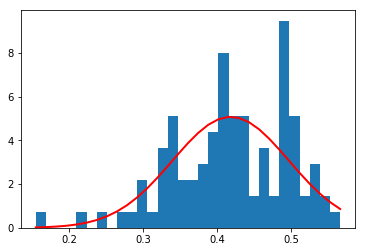

In [167]:
mu = np.mean(score)
sigma = np.std(score)
num = len(score)
rand_data = np.random.normal(mu,sigma,num)
count, bins, ignored = plt.hist(score, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) \
         *np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

This result also shows outstanding performance of gradient boosintg. And noticed that, again, ridge was improved a lot by imvolving 0 budgert indicators.

In this way, we are impressed by the performance of gradient boosting Log_regression in Revenue~Budget+Release_year. And next I will explore more possibilities with more variables in prediction.

## 2.2 Popular movie stars 

Next I can explore if the cast information can help with prediction: I find the most popular actors and set their attendance as a predictor 

Firstly, preprocess the data.

In [168]:
X_cast = X_removed['cast'].values.reshape(-1, 1)
np.shape(X_cast[0])

(1,)

In [169]:
import re

cast=[]
# type(X_cast[0][0][names[0]+9:orders[0]])
for j in range(X_cast.shape[0]):
    names = [substr.start() for substr in re.finditer("\"name\": \"", X_cast[j][0])]
    orders = [substr.start() for substr in re.finditer("\", \"order\"", X_cast[j][0])]
    for i in range(len(names)):
        names[i] = X_cast[j][0][names[i]+9:orders[i]]
    cast.extend(names)
# plt.hist(cast)

In [170]:
from collections import Counter

data = Counter(cast)
# data.most_common(1)[0][0]
data.most_common(3)

[('Samuel L. Jackson', 54), ('Robert De Niro', 49), ('Morgan Freeman', 45)]

Here, I find the top 3 actors act movies more that others. And they are Samuel L. Jackson, Robert De Niro, Morgan Freeman respectively.

And now, I check each movie that whether these three actors have participated in.

#### Here I apply a scheme that, increment 3, 2, 1 weights to the predictor if this movie contains these top-3 actors respectily (more famous, higher scores). And similar strategy is also applied to the following cases

Next I do regression to fit Log_Revenue ~ X_budget_raw + X_budget_zero + X_popular_actor

In [171]:
# X_removed['poplar_actor'] = np.where((X_removed['cast'].find("Samuel L. Jackson")!=-1)||(X_removed['cast'].find("Robert De Niro")!=-1)||(X_removed['cast'].find("Morgan Freeman")!=-1), 1, 0)
X_popular_actor = np.zeros_like(X_date)
for i in range(X_cast.shape[0]):
    if((X_cast[i][0].find("Samuel L. Jackson")!=-1)):
        X_popular_actor[i]+=3
    if((X_cast[i][0].find("Robert De Niro")!=-1)):
        X_popular_actor[i]+=2
    if((X_cast[i][0].find("Morgan Freeman")!=-1)):
        X_popular_actor[i]+=1
# X_budget_zero = X_removed['budget_zero'].values.reshape(-1, 1)

# form feature matrix
X_feature = np.concatenate((X_budget_raw, X_budget_zero, X_popular_actor), axis = 1)

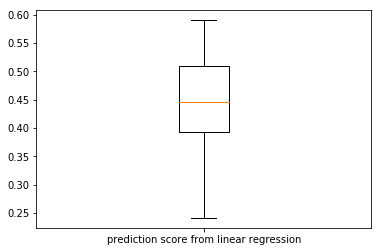

The mean is 0.4459392298826856 and the standard deviation is 0.0781038654888422.


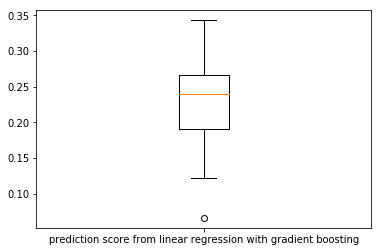

The mean is 0.2313520406108622 and the standard deviation is 0.05308473598662646.


In [203]:
# fit linear regression model

score = [0 for i in range(100)]
score1 = [0 for i in range(100)]

for i in range(100):
    #seperate train and test dataset
    movies_num = np.shape(X_feature)[0]
    order = np.arange(movies_num)
    np.random.shuffle(order)
    X_train = X_feature[order][:3000]
    X_test = X_feature[order][3000:]
    y_train = y_revenue_removed.values[order][:3000]
    y_test = y_revenue_removed.values[order][3000:]
    
    #fit model and evalute
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X_train, y_train)
    score[i] = reg.score(X_test, y_test)
    
    #fit model and evalute for redge regression
    reg1 =  Ridge(alpha=1.0)
    reg1.fit(X_train, y_train)
    score1[i] = reg1.score(X_test, y_test)

# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score)
ax.set_xticklabels(['prediction score from linear regression'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score), \
                                                                np.sqrt(np.var(score))))


# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score1)
ax.set_xticklabels(['prediction score from linear regression with gradient boosting'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score1), \
                                                                np.sqrt(np.var(score1))))

Again, results reveals that gradient boosting hold stronger performanec on regession here. And by involving variable of actor, it has been improved further.
What's more, varianec is is bit smaller, which means by involving the attendance of popular actor, the regression model can be slight more stable.

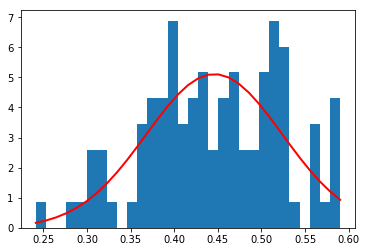

In [204]:
##distribution of result of gradient boosting regression
mu = np.mean(score)
sigma = np.std(score)
num = len(score)
rand_data = np.random.normal(mu,sigma,num)
count, bins, ignored = plt.hist(score, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) \
         *np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

## 2.3 Involving more predictors: popular keywords, most welcome genres, most famous movie companies, and most successful directors,

### 2.3.1 Keywords

In [ ]:
Find three most popular key wirds

In [174]:
X_keywords = X_removed['keywords'].values.reshape(-1, 1)
range(X_keywords.shape[0])

range(0, 3376)

In [175]:
import re

keys=[]
# type(X_cast[0][0][names[0]+9:orders[0]])
for j in range(X_keywords.shape[0]):
    keywords = [substr.start() for substr in re.finditer("\"name\": \"", X_keywords[j][0])]
    ends = [substr.start() for substr in re.finditer("\"}", X_keywords[j][0])]
#     print(ends)
    for i in range(len(keywords)):
        keywords[i] = X_keywords[j][0][keywords[i]+9:ends[i]]
    keys.extend(keywords)
# plt.hist(cast)

In [176]:
from collections import Counter

data = Counter(keys)
# data.most_common(1)[0][0]
data.most_common(3)

[('duringcreditsstinger', 278),
 ('woman director', 185),
 ('based on novel', 179)]

"duringcreditsstinger", "woman director", "based on novel" as most frequent keywords

In [177]:
X_popular_keywords = np.zeros_like(X_date)
for i in range(X_cast.shape[0]):
    if((X_keywords[i][0].find("duringcreditsstinger")!=-1)):
        X_popular_keywords[i]+=3
    if((X_keywords[i][0].find("woman director")!=-1)):
        X_popular_keywords[i]+=2
    if((X_keywords[i][0].find("based on nove")!=-1)):
        X_popular_keywords[i]+=1

### 2.3.2 Genres

In [ ]:
Find three most welcome genres

In [178]:
X_genres = X_removed['genres'].values.reshape(-1, 1)
range(X_genres.shape[0])

range(0, 3376)

In [179]:
gen=[]
# type(X_cast[0][0][names[0]+9:orders[0]])
for j in range(X_genres.shape[0]):
    genres = [substr.start() for substr in re.finditer("\"name\": \"", X_genres[j][0])]
    ends = [substr.start() for substr in re.finditer("\"}", X_genres[j][0])]
#     print(ends)
    for i in range(len(genres)):
        genres[i] = X_genres[j][0][genres[i]+9:ends[i]]
    gen.extend(genres)
# plt.hist(cast)

In [180]:
from collections import Counter

data = Counter(gen)
# data.most_common(1)[0][0]
data.most_common(3)

[('Drama', 1527), ('Comedy', 1174), ('Thriller', 959)]

"Drama", "Comedy", "Thriller" as most frequent genres

In [181]:
X_popular_genres = np.zeros_like(X_date)
for i in range(X_cast.shape[0]):
    if((X_genres[i][0].find("Drama")!=-1)):
        X_popular_genres[i]+=3
    if((X_genres[i][0].find("Comedy")!=-1)):
        X_popular_genres[i]+=2
    if((X_genres[i][0].find("Thriller")!=-1)):
        X_popular_genres[i]+=1

### 2.3.4 Companies

Find three most productive movie companies

In [182]:
X_companies = X_removed['production_companies'].values.reshape(-1, 1)
range(X_companies.shape[0])

range(0, 3376)

In [183]:
comp=[]
# type(X_cast[0][0][names[0]+9:orders[0]])
for j in range(X_companies.shape[0]):
    company = [substr.start() for substr in re.finditer("\"name\": \"", X_companies[j][0])]
    ends = [substr.start() for substr in re.finditer("\", \"id\":", X_companies[j][0])]
#     print(ends)
    for i in range(len(company)):
        company[i] = X_companies[j][0][company[i]+9:ends[i]]
    comp.extend(company)
# plt.hist(cast)

In [184]:
from collections import Counter

data = Counter(comp)
# data.most_common(1)[0][0]
data.most_common(3)

[('Warner Bros.', 285),
 ('Universal Pictures', 276),
 ('Paramount Pictures', 251)]

"Warner Bros.", "Universal Pictures", "Paramount Pictures" as most frequent genres

In [185]:
X_popular_companies = np.zeros_like(X_date)
for i in range(X_cast.shape[0]):
    if((X_companies[i][0].find("Warner Bros.")!=-1)):
        X_popular_companies[i]+=3
    if((X_companies[i][0].find("Universal Pictures")!=-1)):
        X_popular_companies[i]+=2
    if((X_companies[i][0].find("Paramount Pictures")!=-1)):
        X_popular_companies[i]+=1

### 2.3.5 Directors

Find three most outstanding directors

In [186]:
X_director = X_removed['crew'].values.reshape(-1, 1)
range(X_director.shape[0])

range(0, 3376)

In [187]:
dire=[]
# type(X_cast[0][0][names[0]+9:orders[0]])
for j in range(X_director.shape[0]):
    job = [substr.start() for substr in re.finditer("\"job\": \"", X_director[j][0])]
    ends = [substr.start() for substr in re.finditer("\", \"name\"", X_director[j][0])]
#     print(ends)
    for i in range(len(job)):
        job[i] = X_director[j][0][job[i]+8:ends[i]]
    dire.extend(job)
# plt.hist(cast)
# dire
cast=[]
# type(X_cast[0][0][names[0]+9:orders[0]])
for j in range(X_director.shape[0]):
    name = [substr.start() for substr in re.finditer("\"name\": \"", X_director[j][0])]
    ends = [substr.start() for substr in re.finditer("\"}", X_director[j][0])]
#     print(ends)
    for i in range(len(name)):
        name[i] = X_director[j][0][name[i]+9:ends[i]]
    cast.extend(name)

directors=[]
for i in range(len(dire)):
    if dire[i]=="Director":
        directors.append(cast[i])

In [188]:
from collections import Counter

data = Counter(directors)
# data.most_common(1)[0][0]
data.most_common(3)

[('Steven Spielberg', 27), ('Clint Eastwood', 20), ('Martin Scorsese', 17)]

In [189]:
X_popular_directors = np.zeros_like(X_date)
for i in range(X_cast.shape[0]):
    if((X_director[i][0].find("Steven Spielberg")!=-1)):
        X_popular_directors[i]+=3
    if((X_director[i][0].find("Clint Eastwood")!=-1)):
        X_popular_directors[i]+=2
    if((X_director[i][0].find("Martin Scorsese")!=-1)):
        X_popular_directors[i]+=1

(array([3.231e+03, 0.000e+00, 4.400e+01, 0.000e+00, 4.600e+01, 0.000e+00,
        5.300e+01, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

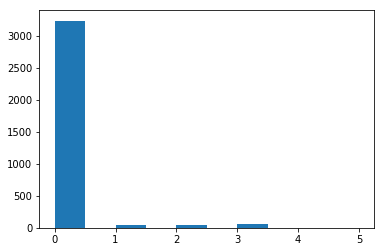

In [249]:
plt.hist(X_popular_actor)

(array([2769.,    0.,  160.,    0.,  159.,    0.,  263.,    0.,    9.,
          16.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

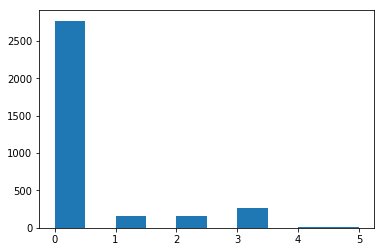

In [250]:
plt.hist(X_popular_keywords)

(array([523., 500.,   0., 767.,   0., 847., 391.,   0., 339.,   9.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

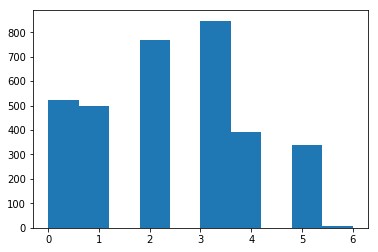

In [251]:
plt.hist(X_popular_genres)

(array([2.56e+03, 0.00e+00, 2.41e+02, 0.00e+00, 2.72e+02, 0.00e+00,
        2.97e+02, 0.00e+00, 5.00e+00, 1.00e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

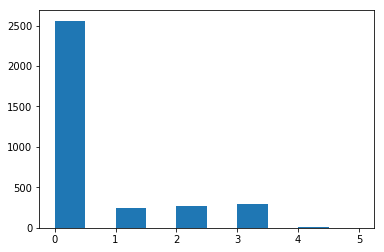

In [252]:
plt.hist(X_popular_companies)

(array([3.275e+03, 0.000e+00, 1.800e+01, 0.000e+00, 1.900e+01, 0.000e+00,
        6.100e+01, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

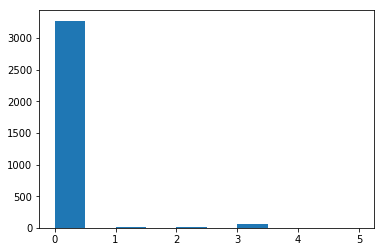

In [253]:
plt.hist(X_popular_directors)

## 2.4 Do more comprehensive regression by using above predictors 

### 2.4.1 Log Revenue ~ Budge + Release_year + Company + Actor^2 + Keywords + Director

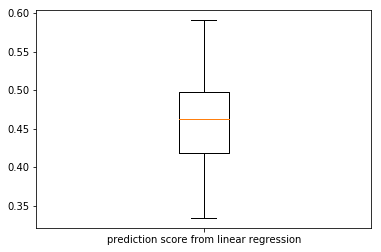

The mean is 0.45553432421978884 and the standard deviation is 0.04933400567925004.


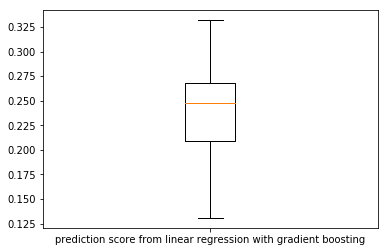

The mean is 0.24091736209917847 and the standard deviation is 0.0434401651252636.


In [224]:
X_feature = np.concatenate((X_budget_raw, X_year, X_popular_companies, X_popular_actor*X_popular_actor, X_popular_keywords, X_popular_directors), axis = 1)
# X_budget_zero X_popular_genres
score = [0 for i in range(100)]
for i in range(100):
    #seperate train and test dataset
    movies_num = np.shape(X_feature)[0]
    order = np.arange(movies_num)
    np.random.shuffle(order)
    X_train = X_feature[order][:3000]
    X_test = X_feature[order][3000:]
    y_train = y_revenue_removed.values[order][:3000]
    y_test = y_revenue_removed.values[order][3000:]
    
    #fit model and evalute
    reg = GradientBoostingRegressor(random_state=1, learning_rate=5e-2)
    reg.fit(X_train, y_train)
    score[i] = reg.score(X_test, y_test)
    
    #fit model and evalute for redge regression
    reg1 =  Ridge(alpha=1.0)
    reg1.fit(X_train, y_train)
    score1[i] = reg1.score(X_test, y_test)

# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score)
ax.set_xticklabels(['prediction score from linear regression'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score), \
                                                                np.sqrt(np.var(score))))

# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score1)
ax.set_xticklabels(['prediction score from linear regression with gradient boosting'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score1), \
                                                                np.sqrt(np.var(score1))))

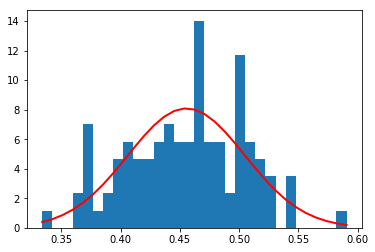

In [225]:
mu = np.mean(score)
sigma = np.std(score)
num = len(score)
rand_data = np.random.normal(mu,sigma,num)
count, bins, ignored = plt.hist(score, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) \
         *np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

By tuning the parameters,I get a better performed linear model with gradient boosting regression, which can reach 0.456 appriximately (in my trails).
This linear model is fitted with predictors: Budge + Release_year + Company + Actor^2 + Keywords + Director. Here I take Actor as squre because I noticed that involving of actor can boost the model more than other variables, so I set a heavier weight to actor. More realistcly, this implies that popular actors/ movie stars can signigicantly affect the quality of a movie.

### 2.4.2 Log Revenue ~ Budge + Release_year + 2*Company + Actor^2  + Director^2

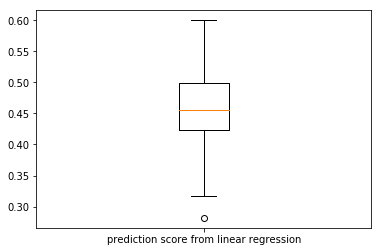

The mean is 0.455357326880977 and the standard deviation is 0.05449597872027368.


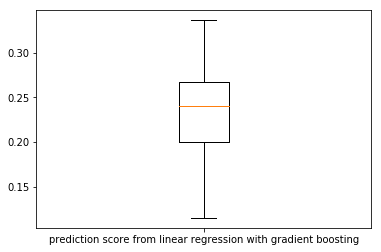

The mean is 0.23572808506420664 and the standard deviation is 0.048155938390275904.


In [229]:
X_feature = np.concatenate((X_budget_raw, X_year, 2*X_popular_companies, X_popular_actor*X_popular_actor, X_popular_directors*X_popular_directors), axis = 1)
# X_budget_zero X_popular_genres
score = [0 for i in range(100)]
for i in range(100):
    #seperate train and test dataset
    movies_num = np.shape(X_feature)[0]
    order = np.arange(movies_num)
    np.random.shuffle(order)
    X_train = X_feature[order][:3000]
    X_test = X_feature[order][3000:]
    y_train = y_revenue_removed.values[order][:3000]
    y_test = y_revenue_removed.values[order][3000:]
    
    #fit model and evalute
    reg = GradientBoostingRegressor(random_state=1, learning_rate=5e-2)
    reg.fit(X_train, y_train)
    score[i] = reg.score(X_test, y_test)
    
    #fit model and evalute for redge regression
    reg1 =  Ridge(alpha=1.0)
    reg1.fit(X_train, y_train)
    score1[i] = reg1.score(X_test, y_test)

# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score)
ax.set_xticklabels(['prediction score from linear regression'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score), \
                                                                np.sqrt(np.var(score))))

# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score1)
ax.set_xticklabels(['prediction score from linear regression with gradient boosting'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score1), \
                                                                np.sqrt(np.var(score1))))

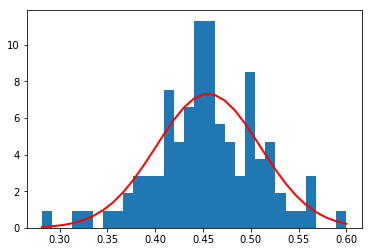

In [230]:
mu = np.mean(score)
sigma = np.std(score)
num = len(score)
rand_data = np.random.normal(mu,sigma,num)
count, bins, ignored = plt.hist(score, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) \
         *np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

This time I increased the weight of director by taking square and slightly increased the weight of company by doubling. Result shows generally good similar to previous scheme. Note the doubling the variable of company means increase the scale of company's value, and this would increase its contribution to the model but would not affect its linearity.

### 2.4.2 Log Revenue ~ Budge + Release_year + 2*Company + Actor * Director

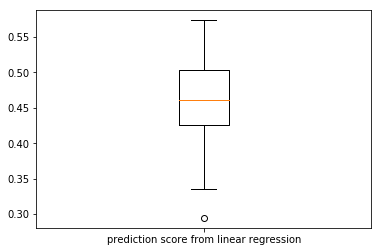

The mean is 0.4614874235777947 and the standard deviation is 0.05535067457615199.


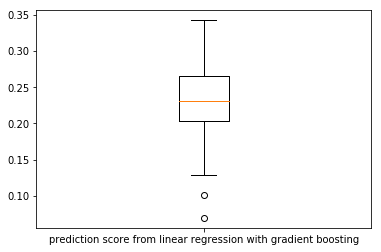

The mean is 0.2311922277582692 and the standard deviation is 0.05160550172852028.


In [239]:
X_feature = np.concatenate((X_budget_raw, X_year, 2*X_popular_companies, X_popular_actor*X_popular_directors), axis = 1)
# X_budget_zero X_popular_genres
score = [0 for i in range(100)]
for i in range(100):
    #seperate train and test dataset
    movies_num = np.shape(X_feature)[0]
    order = np.arange(movies_num)
    np.random.shuffle(order)
    X_train = X_feature[order][:3000]
    X_test = X_feature[order][3000:]
    y_train = y_revenue_removed.values[order][:3000]
    y_test = y_revenue_removed.values[order][3000:]
    
    #fit model and evalute
    reg = GradientBoostingRegressor(random_state=1, learning_rate=5e-2)
    reg.fit(X_train, y_train)
    score[i] = reg.score(X_test, y_test)
    
    #fit model and evalute for redge regression
    reg1 =  Ridge(alpha=1.0)
    reg1.fit(X_train, y_train)
    score1[i] = reg1.score(X_test, y_test)

# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score)
ax.set_xticklabels(['prediction score from linear regression'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score), \
                                                                np.sqrt(np.var(score))))

# visualize prediction score
fig = plt.figure()  
ax = plt.subplot()  
ax.boxplot(score1)
ax.set_xticklabels(['prediction score from linear regression with gradient boosting'])
plt.show()
print("The mean is {} and the standard deviation is {}.".format(np.mean(score1), \
                                                                np.sqrt(np.var(score1))))

In considering the previous schemes, I come up with a model Log Revenue ~ Budge + Release_year + 2*Company + Actor * Director

This is in considering that actor and director are significant in predicion, so I multiply them together as a predictor. This improves the performance to 0.461 apprimately (in my trails)

## Conclusion

According to experiment above, I notice that best fit model appear in cosidering the budget, release year, doubled company, and (popular actors)mulitplies(popular directors) by using Gradient Boosting Regression
Above all, this report started from base line of the linear model, traversed ridge and gradient boosting regression. And figure out gradient would immediately improve the performance of the prediction, and ridge regression would only improve after involving zero indicators of budgts.
Then I explored the data set and extracted releasing year and most famous actors, directors, genres, companies, keywords as features to involve more variables into the prediction. By traversing and trails, I figured out that actors and directors and comparably important predictors to the model. Then I considered the synergy effect and tied non-linear effect of these two factors. Results shows that this indeed strenthen the model.
Then I inspect these models in a more realistic and holistic perspective. The result tell us that, the quantity of a movie would be significantly affected by it's actors and director. Movie stars and famous directors often affects a moive's reflection in the market powerfully. Except for these, releasing time and releasing company, etc. afftects the movies as well but in a smaller extend. And all these is consistent with our intuition in real-world life.